In [24]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import ErdosRenyi
from viz import draw_data
from utils import Timer, partition
from enginep import calc
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [47]:
n = 1000 # number of vertices
p = 20 / n # avg deg 
T = 100
TAIL = T // 2
I = 10

In [44]:
alpha = .10
bs = partition(0, 50, 64)

In [48]:
%%notify
timer = Timer()
mem = calc([alpha], bs, T, I, n, p)
fast_mem = np.array(mem)
timer.print_elapsed()

time elapsed = 177.09571766853333


<IPython.core.display.Javascript object>

In [49]:
def calc_slow():
    pool = Pool(32)
    res = []
    timer = Timer()
    for i in range(I):
        local_timer = Timer()
        graph = ErdosRenyi(n, p)
        res.append(pool.map(fun, [(graph, b, alpha, T) for b in bs]))
        print(f'realization {i} passed in {local_timer.measure()}', flush=True)
    timer.print_elapsed()
    return np.array(res)

In [50]:
%%notify
slow_mem = calc_slow()

realization 0 passed in 14.416705131530762
realization 1 passed in 14.124550342559814
realization 2 passed in 14.300210952758789
realization 3 passed in 14.888910293579102
realization 4 passed in 14.693166971206665
realization 5 passed in 14.640526533126831
realization 6 passed in 14.680449724197388
realization 7 passed in 14.60892939567566
realization 8 passed in 15.006274223327637
realization 9 passed in 14.911363363265991
time elapsed = 146.2816982269287


<IPython.core.display.Javascript object>

In [52]:
fast_mem.shape

(10, 32, 2000)

In [39]:
def plot_mean_and_std(data):
    fig, axs = plt.subplots(2)
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-TAIL:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[0].plot(bs, cur, '.-')
    
    cur = np.apply_along_axis(lambda x: np.std(x[-TAIL:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[1].plot(bs, cur, '.-')

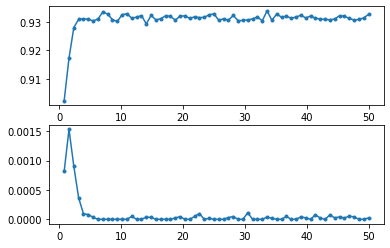

In [54]:
plot_mean_and_std(fast_mem)

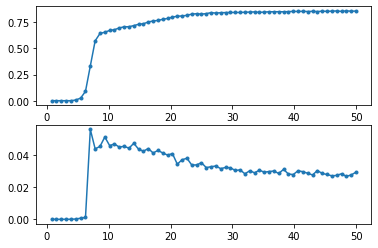

In [55]:
plot_mean_and_std(slow_mem)